In [1]:
%matplotlib inline
import numpy as np
import ising
import matplotlib.pyplot as plt

In [2]:
N, NP       = 64, 32
eqSteps, mcSteps = 8000, 8000


Temperature   = np.zeros((NP), dtype=np.float64)
Energy        = np.zeros((NP), dtype=np.float64)
Magnetization = np.zeros((NP), dtype=np.float64)
SpecificHeat  = np.zeros((NP), dtype=np.float64)
Suseptibility = np.zeros((NP), dtype=np.float64)
Spin          = np.zeros((N+2,N+2), dtype=np.int32  )

#Temperature 
tc=2.2691
Temperature = np.linspace(tc-1, tc+1, NP)
Beta = 1.0/Temperature   # set k_B = 1

#instantiate the class Ising model
Ising = ising.Ising(N, NP, eqSteps, mcSteps)

Ising.twoD(Spin, Energy, Magnetization, SpecificHeat, Suseptibility, Beta)

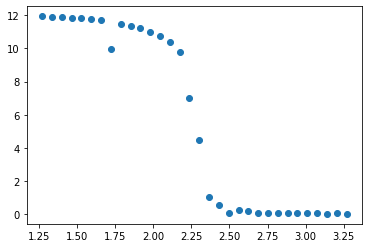

In [3]:
plt.plot(Temperature, abs(Magnetization), "o")

## Exponent

In [4]:
N, NP       = 10, 10
eqSteps, mcSteps = 6000, 8000


Temperature   = np.zeros((NP), dtype=np.float64)
Energy        = np.zeros((NP), dtype=np.float64)
Magnetization = np.zeros((NP), dtype=np.float64)
SpecificHeat  = np.zeros((NP), dtype=np.float64)
Suseptibility = np.zeros((NP), dtype=np.float64)
Spin          = np.zeros((N+2,N+2), dtype=np.int32  )

#Temperature 
tc=2.2691
Temperature = np.linspace(tc+0.1, tc+1.8, NP)
Beta = 1.0/Temperature   # set k_B = 1

#instantiate the class Ising model
Ising = ising.Ising(N, NP, eqSteps, mcSteps)

Ising.twoD(Spin, Energy, Magnetization, SpecificHeat, Suseptibility, Beta)

sim = 1.1345995836156566 	 analytical = 1


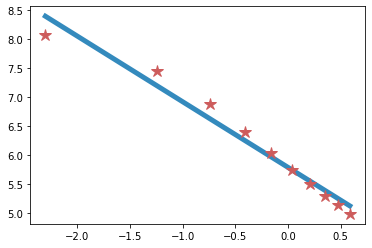

In [5]:
## plot the susceptibility and exponent
eps=1e-19
xx=abs(Temperature-tc)+eps
yy=abs(Suseptibility)+eps


coefficients = np.polyfit(np.log(xx), np.log(yy), 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(np.log(xx))
plt.plot(np.log(xx), ys, '-', lw=5,  color="#348ABD", label='best linear fit ')
plt.plot(np.log(xx), np.log(yy), '*', color="IndianRed", ms=12, label='Magnetization');


print("sim =", abs(coefficients[0]), "\t", "analytical = 1")